<a href="https://colab.research.google.com/github/Rahman88talha/Capstone_Project_Stock_Closing_Price_Prediction/blob/main/Group_colab_Yes_Bank_Close_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title :-  </u></b> <b> YES BANK STOCK CLOSING PRICE PREDICTION. <b>
---
---

---
## <b> Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month </b>
---

#We have Yes Bank monthly stock price dataset. It has following features (Column):
### **1) Open** : Opening price of the stock of particular day
### **2) High** : It's the highest price at which a stock traded during a period
### **3) Low** : It's the lowest price at which stock traded during a period
### **4) Close** : Closing price of a stock at the end of a Trading Day
### **5) Date** : We will use it as a index
---

<b>"Trying to know our data because if you know your data then only you can implent your ideas and get insights from it"</b>

We understood our problem and what our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

<b> Feature Engineering</b>: Introducing New Variables, Dummy Variables

<b>Univariate Analysis</b>: Distplot, Histogram, Barplot

<b>Bivariate Analysis</b>: Boxplot, Jointplot, Heatmap, 

<b>Introduced Models</b>: Linear Regression, Lasso, Ridge and ElasticNet

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### <b> LET'S INVITE OUR DATASET</b>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Import dataset
stock_df = pd.read_csv('/content/drive/MyDrive/Capstone Project Supervised ML Regression(Alma Better)/data_YesBank_StockPrices.csv')

In [8]:
#Reading first 5 rows of dataset
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [9]:
#Reading first 5 rows of dataset
stock_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [10]:
#get the number of rows and columns in the dataset 
stock_df.shape

(185, 5)

In [11]:
#Getting all info about our dataset
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Hurray! There is no null values in any instances.**

But **Date** have values in object data type. So, we need to convert it into proper date format.

In [12]:
#importing datetime
from datetime import datetime 
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [13]:
stock_df.head(3)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30


In [14]:
#Descriptive Statistics
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


As it is clearly shown in the descriptive statistics table, there is very high variation within features like **High**, **Low** and **Close**. 



In [15]:
#cheking is there any duplication in our data.
len(stock_df[stock_df.duplicated()])

0

There is no duplication in our data which is a good sign otherwise we have to deal with that too.

## <b> VISUALIZING THE DEPENDENT VARIABLE</B>

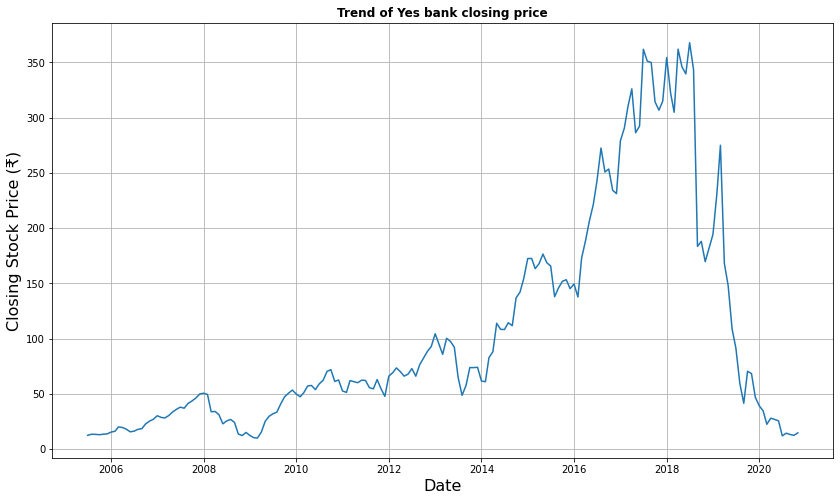

In [16]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(stock_df['Date'],stock_df['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

Text(0, 0.5, 'Density')

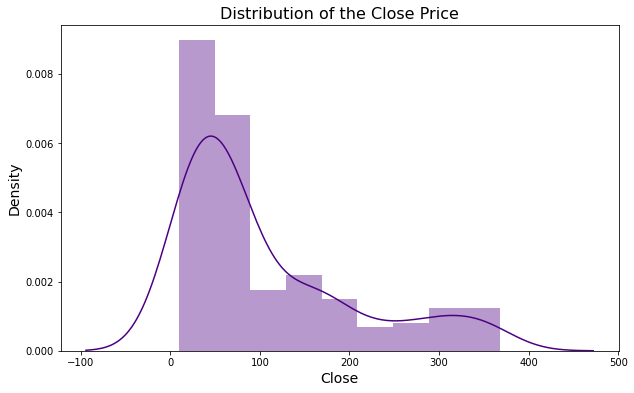

In [17]:
#Checking the distribution of our dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(stock_df['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

The distribution of Stock Closing Price is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying **Log Transformation** then we'll have a look how this data behave.

Text(0.5, 1.0, 'Distribution of the Close Price after log transformation')

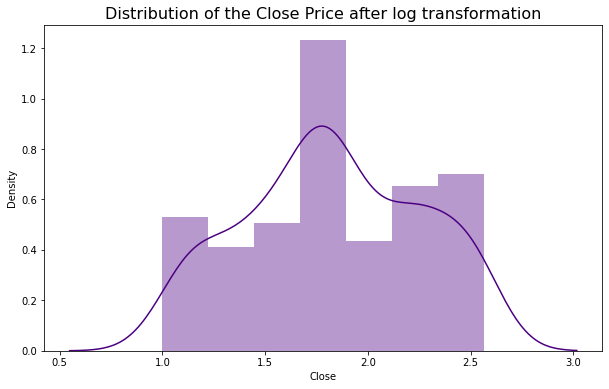

In [18]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(stock_df['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)

In [19]:
stock_df_dup=stock_df.copy()

In [20]:
#independent and dependent variables
indep_var=stock_df_dup[['High','Low','Open']]
dep_var=stock_df_dup['Close']

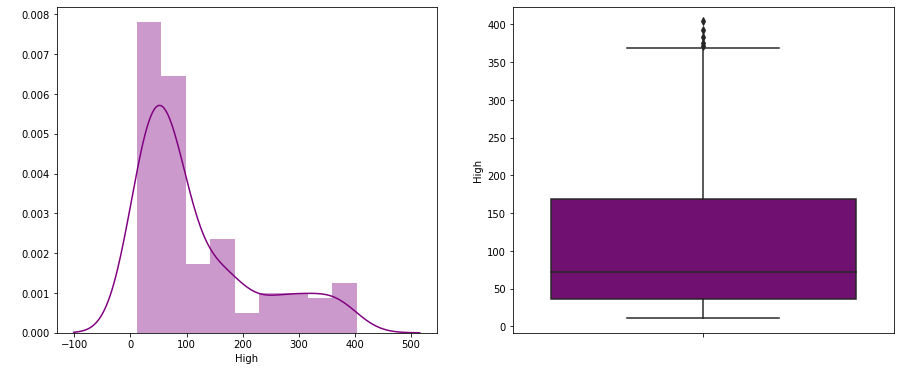

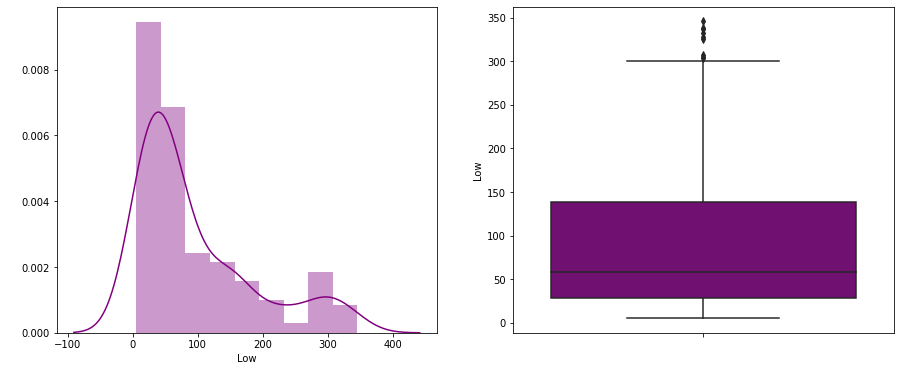

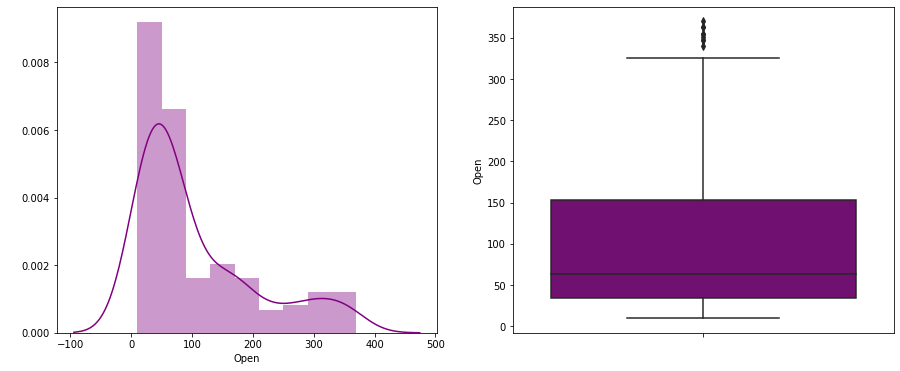

In [21]:
#plot for independent variable
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(stock_df_dup[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=stock_df_dup[var],color='purple')
    fig.set_title('')
    fig.set_ylabel(var)

After applying log transformation on each independent variables, we can see the difference between the distribution between the graphs before applying log transformation and after applying log transformation 

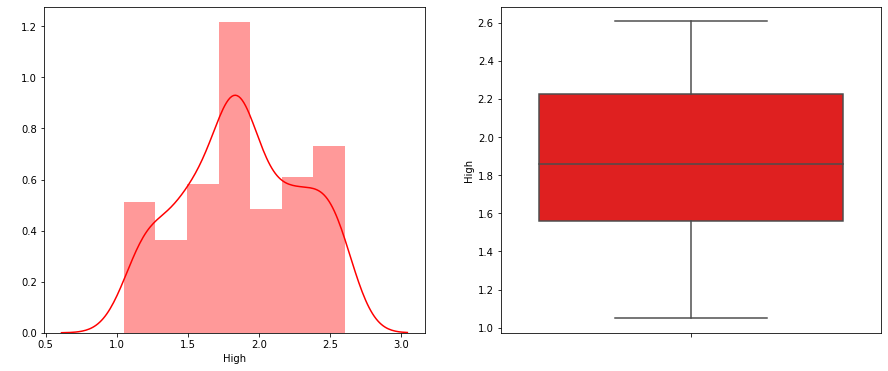

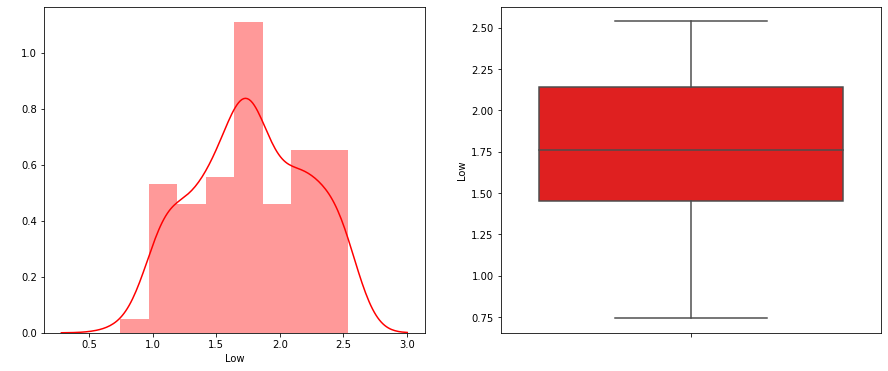

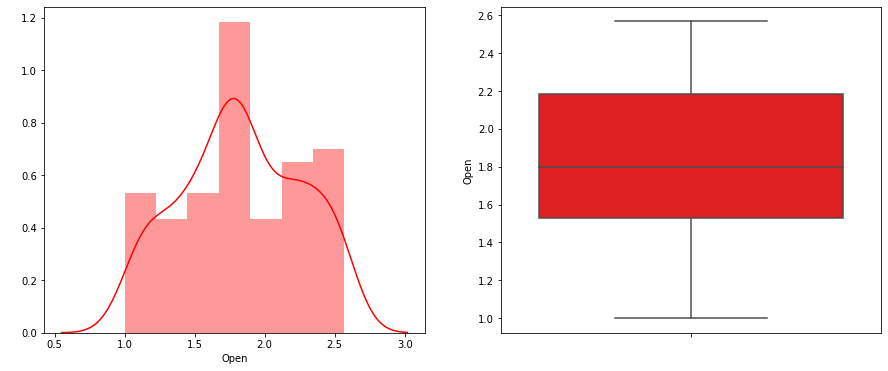

In [22]:
#plot for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(stock_df_dup[var]),color='red')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(stock_df_dup[var]),color='red')
    fig.set_title('')
    fig.set_ylabel(var)

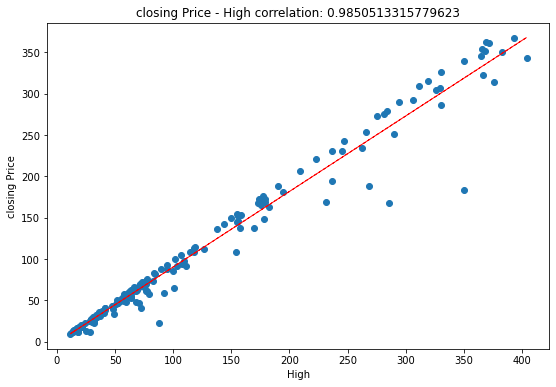

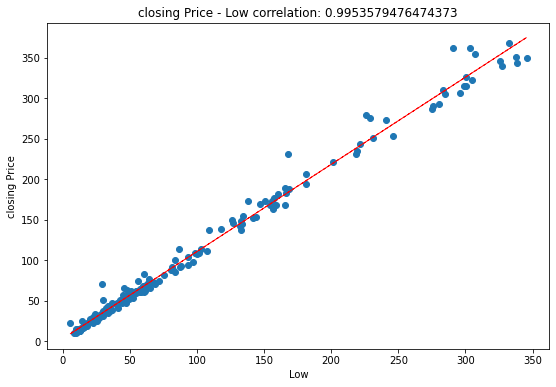

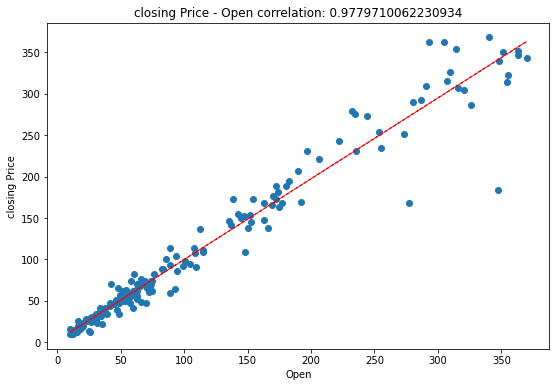

In [23]:
#checking the correlation with dependent varible
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = stock_df_dup[col]
   label = stock_df_dup['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(stock_df_dup[col], stock_df_dup['Close'], 1)
   y_hat = np.poly1d(z)(stock_df_dup[col])
 
   plt.plot(stock_df_dup[col], y_hat, "r--", lw=1)
 
plt.show()

As we can see that there is linear relation and high correlation between each independent variables and dependent variables. 

Now we move towards some feature engineering and see what we can implement in our dataset and if there is any relation between introducing variables between themselves and with the dependent variable.

In [24]:
#adding average column
stock_df_dup['Average'] = (stock_df_dup['Low'] + stock_df_dup['High'])/2
#adding month column
stock_df_dup['Month'] = stock_df_dup['Date'].apply(lambda y: y.strftime('%B'))
#introducing new features of name year
stock_df_dup['Year'] = stock_df_dup['Date'].apply(lambda z: z.strftime('%Y'))

In [25]:
#Making date column as index
stock_df_dup.index = stock_df_dup['Date']
stock_df_dup.drop('Date',axis = 1,inplace = True)

In [26]:
stock_df_dup.head(3)

,Open,High,Low,Close,Average,Month,Year
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,2005
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,2005
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,2005


### <b> Let's check how <code>Shift()</code> function predict Closing price of *Yes Bank* further, we'll test our model with recent dataset.

In [27]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
future_months = 1
stock_df_dup['Prediction'] = stock_df_dup[['Close']].shift(-future_months)               # Shift() Function shifts index by the desired number of periods
stock_df_dup.head(3)

,Open,High,Low,Close,Average,Month,Year,Prediction
Date,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,2005,13.42
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,2005,13.30
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,2005,12.99


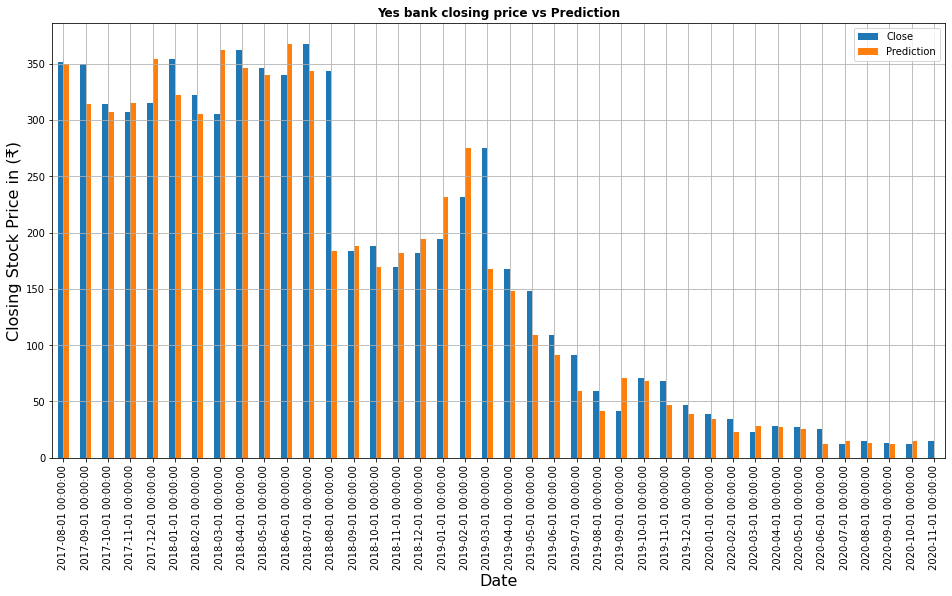

In [28]:
#Closing price vs prediction
stock_df_dup[['Close','Prediction']].tail(40).plot(kind='bar',figsize=(16,8))                  
plt.grid(True)                                                        
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

In [29]:
# drop prediction field
stock_df_dup.drop('Prediction',axis = 1,inplace = True)

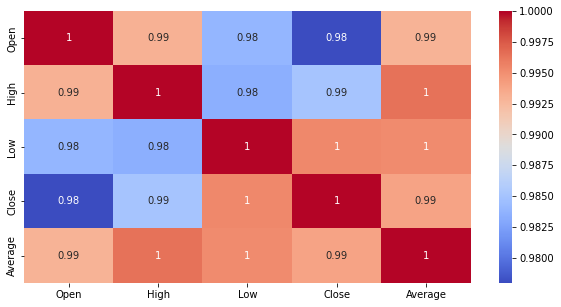

In [30]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(stock_df_dup.corr(), annot = True, cmap='coolwarm')
plt.show()

There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

In [31]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [32]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,inf
2,Low,inf
3,Average,inf


We have very high VIF in our dataset so, we have to drop one them which is least correlated with dependent variable

In [33]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Average']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Before deleting any variable again we have to plot heatmap between left independet variables and dependent variable.
 
So, we can decide which variable we can drop.

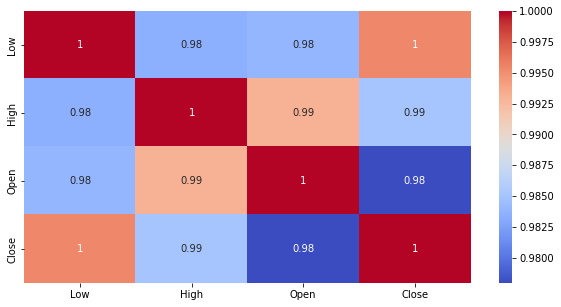

In [34]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(stock_df_dup[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Now, we'll drop **Open** feature from the VIF matrix.

In [35]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Average','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


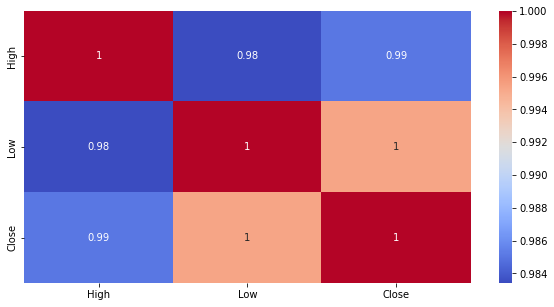

In [36]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(stock_df_dup[['High','Low','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Our final dropping variable will be **High** feature because it has less correlation with dependent variable in comparison with dependet variable(**Close**). 

We've dropped 3 features from our dataset it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the **Low** Variable.


In [37]:
#introducing dummy variables
stock_df_dup = pd.get_dummies(stock_df_dup,columns = ['Year'])

In [38]:
stock_df_dup.head(3)

,Open,High,Low,Close,Average,Month,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,July,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.58,14.88,12.55,13.42,13.715,August,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-01,13.48,14.87,12.27,13.30,13.570,September,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
stock_df_dup.shape

(185, 22)

#### **Total Indepedent Variables**

In [40]:
#independent Variables
total_features  = ['Low','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010',
                   'Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Year_2016','Year_2017',
                   'Year_2018','Year_2019','Year_2020']
print("Total independent variables: ",len(total_features))

Total independent variables:  17


## **Linear Regression**

In [41]:
#Installing scipy 
!pip install scipy

In [42]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = round(stock_df_dup[total_features].apply(zscore),3)

In [43]:
#applying log on dependent variable 
y = np.log10(stock_df_dup['Close'])

In [44]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [45]:
#Split our data into train and test datasets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 17)
X_test:  (37, 17)
y_train:  (148,)
y_test:  (37,)


In [46]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [47]:
#Applying Linear Regression 
lr = LinearRegression()
lin_reg = lr.fit(X_train,y_train)

In [48]:
#Checking efficiency of training model
lin_reg.score(X_train,y_train)

0.9403589632859228

In [49]:
#getting regression coefficients 
print('Intercept:',lin_reg.intercept_)
print('Regressors: \n',lin_reg.coef_)

Intercept: -58875444889.93408
Regressors: 
 [3.05309444e-01 7.90575959e+12 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.05553484e+13]


In [50]:
#Predict y_test on the basis of train sets
y_pred = lin_reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.41552734 2.13427734 1.83740234 2.10693359 1.79833984 1.53271484
 2.40771484 1.24365234 1.09521484 2.31005859 2.53662109 1.97802734
 2.16943359 1.71240234 2.67724609 2.47021484 1.82958984 1.40380859
 2.25146484 1.75927734 1.33740234 2.02099609 2.14990234 1.77880859
 2.34912109 1.79833984 2.45068359 1.09521484 2.00146484 1.69287109
 2.71630859 2.46630859 1.87646484 2.21240234 1.55615234 1.75146484
 2.49172211]


In [51]:
test_df['LR Predicted Closing Price'] = 10**y_pred
test_df.head(3)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,34.06,26.033187
2015-12-01,145.23,136.231439
2019-12-01,46.95,68.770526


In [52]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(y_test,data)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  return

In [53]:
evaluation_metrics(y_pred)

Mean Squared Error:  0.008367958757531737
Root Mean Squared Error:  0.09147654758205372
R2:  0.9550791607186839
Adjusted R2:  0.9148868308354011


In [54]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_percentage_error
MAE  = mean_absolute_percentage_error

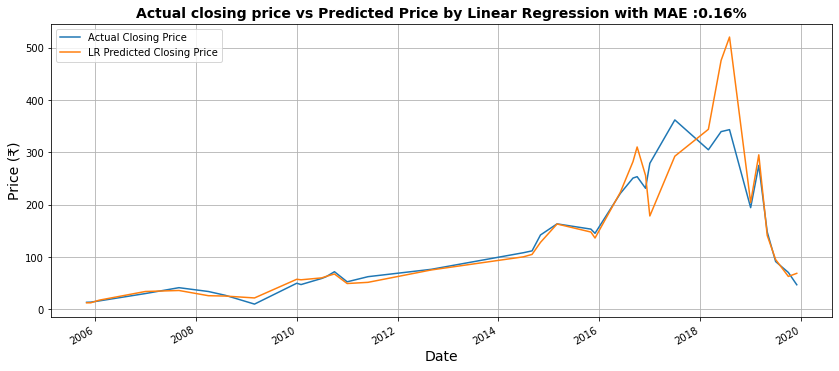

In [55]:
#Graph between Actual Close price and Predicted Price
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()


## **RIDGE REGRESSION**

In [56]:
ridge  = Ridge(alpha=0.1 , max_iter= 5000)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, max_iter=5000)

In [57]:
ridge.score(X_train,y_train)

0.9457766805321504

In [58]:
y_pred_r = ridge.predict(X_test)

In [59]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_r)

Mean Squared Error:  0.009365359873489867
Root Mean Squared Error:  0.0967747894520565
R2:  0.9497249164487018
Adjusted R2:  0.9047419469554351


### Applying cross validation and Hyperparameter Tuning in Ridge

In [60]:
# Applying ridge regression to penalize our parameters
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [61]:
print("Best Alpha :" ,ridge_regressor.best_params_)
print("\n By Using ",ridge_regressor.best_params_, " Negative mean squared error is: ", ridge_regressor.best_score_)

Best Alpha : {'alpha': 3}

 By Using  {'alpha': 3}  Negative mean squared error is:  -0.012538304166010362


In [62]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [63]:
#Getting evaluation metrics for Ridge
evaluation_metrics(y_pred_ridge)

Mean Squared Error:  0.008847513525776934
Root Mean Squared Error:  0.09406122222136461
R2:  0.9525048169276678
Adjusted R2:  0.9100091268103179


In [64]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(3)

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2008-04-01,34.06,26.142190
2015-12-01,145.23,146.673951
2019-12-01,46.95,64.154295


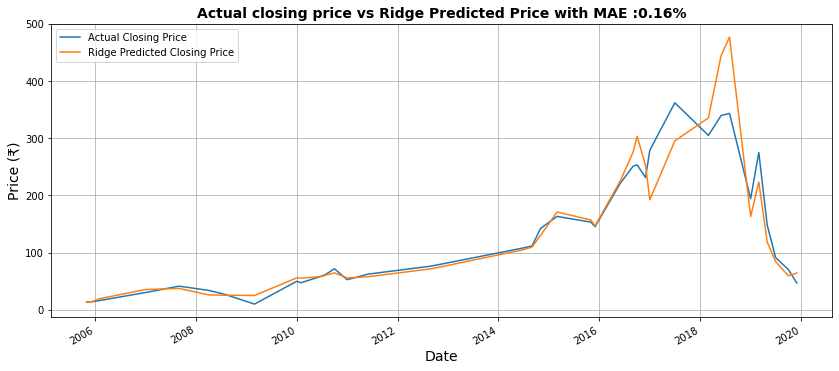

In [65]:
#Graph between Actual Close price and Ridge Predicted Price
ridge_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Ridge Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_ridge)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()


## **LASSO REGRESSION**

In [66]:
lasso  = Lasso(alpha=0.0001 , max_iter= 6000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=6000)

In [67]:
lasso.score(X_train, y_train)

0.9457772741406169

In [68]:
y_pred_L = lasso.predict(X_test)

In [69]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_L)

Mean Squared Error:  0.00940109189845321
Root Mean Squared Error:  0.09695922802112861
R2:  0.9495330999499494
Adjusted R2:  0.9043785051683252


In [70]:
# Cross Validation 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [71]:
print("Best fit alpha value:" ,lasso_regressor.best_params_)
print("\nBy Using ",lasso_regressor.best_params_, " Negative mean squared error is: ", lasso_regressor.best_score_)

Best fit alpha value: {'alpha': 0.0014}

By Using  {'alpha': 0.0014}  Negative mean squared error is:  -0.01263071552015855


In [72]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [73]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_lasso)

Mean Squared Error:  0.009376701436556797
Root Mean Squared Error:  0.09683336943717696
R2:  0.9496640327198869
Adjusted R2:  0.9046265883113646


In [74]:
# Introducing Data frame for Actual closing price and Lasso Predicted Closing Price 
test_df['Lasso Predicted Closing Price'] = 10**y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_df.head(3)

,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,34.06,26.365934
2015-12-01,145.23,144.313848
2019-12-01,46.95,59.849779


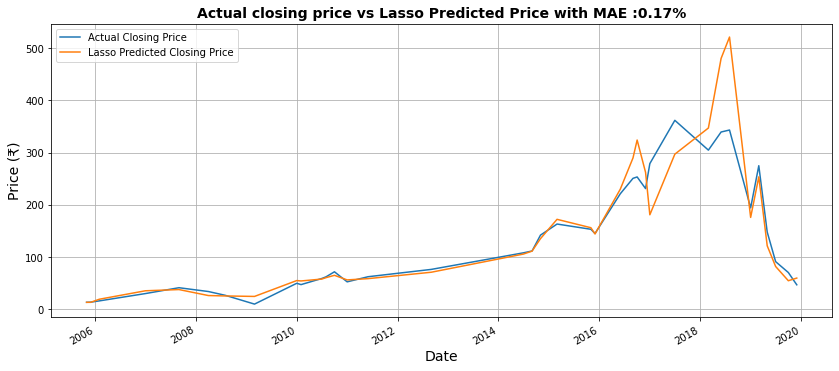

In [75]:
#Graph between Actual Close price and Lasso Predicted Price
lasso_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Lasso Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_lasso)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

## **ElasticNet Regression Model**

In [76]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [77]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [78]:
elasticnet.score(X_train, y_train)

0.8264020056976695

In [79]:
print('Intercept of Elastic Model: ',elasticnet.intercept_)
print('Regressors of Elastic Model:\n ',elasticnet.coef_)

Intercept of Elastic Model:  1.8229123183603404
Regressors of Elastic Model:
  [ 0.29700938 -0.02212586 -0.0330104  -0.         -0.00727482 -0.00181328
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.02971941]


In [80]:
y_pred_en = elasticnet.predict(X_test)

In [81]:
#getting evaluation metrics for Ridge
evaluation_metrics(y_pred_en)

Mean Squared Error:  0.030334217104865353
Root Mean Squared Error:  0.17416721018855802
R2:  0.8371599895774178
Adjusted R2:  0.6914610328835284


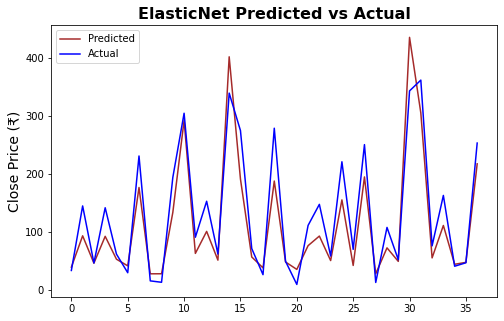

In [82]:
# Plot of ElasticNet Actual vs Predicted
plt.figure(figsize=(8,5))
plt.plot(10**y_pred_en,color = 'brown')
plt.plot(np.array(10**y_test),color = 'blue')
plt.legend(["Predicted","Actual"])
plt.ylabel('Close Price (₹)',fontsize = 14)
plt.title('ElasticNet Predicted vs Actual',fontweight = 'bold',fontsize = 16)
plt.show()

### Applying Cross Validation for ElasticNet Regression Model

In [83]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [84]:
print("Best fit alpha value :" ,elastic_regressor.best_params_)
print("\nBy Using ",elastic_regressor.best_params_, " Negative mean squared error is: ", elastic_regressor.best_score_)

Best fit alpha value : {'alpha': 0.01, 'l1_ratio': 0.3}

By Using  {'alpha': 0.01, 'l1_ratio': 0.3}  Negative mean squared error is:  -0.01233335084816529


In [85]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [86]:
#Getting Evaluation metrics for ElasticNet after applying Cross-Validation
evaluation_metrics(y_pred_elastic)

Mean Squared Error:  0.009096377849834535
Root Mean Squared Error:  0.09537493302663198
R2:  0.9511688645612937
Adjusted R2:  0.9074778486424512


In [87]:
# Inroducing dataframe for Actual closing price and ElasticNet predicted Closing Price 
test_df['ENet Predicted Closing Price'] = 10**y_pred_elastic
Enet_df = test_df.loc[:,['Actual Closing Price','ENet Predicted Closing Price']]
Enet_df.head(3)

,Actual Closing Price,ENet Predicted Closing Price
Date,,
2008-04-01,34.06,26.763841
2015-12-01,145.23,142.542580
2019-12-01,46.95,59.677823


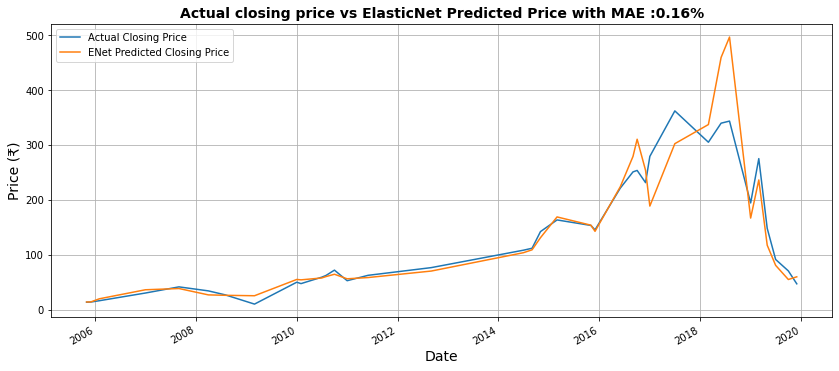

In [88]:
#Graph between Actual Close price and ElasticNet Predicted Price
Enet_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs ElasticNet Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_elastic)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

## <b> Over all graphical representation between Actual Closing Price and Predicted Closing Price by All Algorithms.</b>

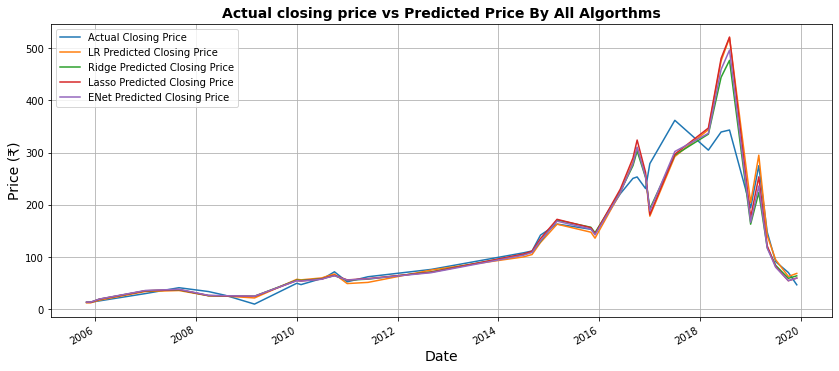

In [89]:
#Graph between Actual Close price and Predicted Price by All Algorithms.
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price By All Algorthms',fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

### **Final Matrix**

In [90]:
#Comparison between algorithms 
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [lin_reg,ridge,lasso,elasticnet]

def error_matrix(Y):
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,Y)
  adj_r2 = 1-(1-r2_score(y_test,Y))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))

  return MSE,RMSE,r_2,adj_r2

def training_accuracy(models):
  train_accuracy = []
  for model in reg_models:
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
  return train_accuracy



accuracy_df = pd.DataFrame(index = accuracy_list)
accuracy_df['Linear Regression'] = error_matrix(y_pred)
accuracy_df['Ridge'] = error_matrix(y_pred_ridge)
accuracy_df['Lasso'] = error_matrix(y_pred_lasso)
accuracy_df['ElasticNet'] = error_matrix(y_pred_elastic)
accuracy_df.loc['Training Accuracy'] = training_accuracy(reg_models)
accuracy_df

,Linear Regression,Ridge,Lasso,ElasticNet
MSE,0.008368,0.008848,0.009377,0.009096
RMSE,0.091477,0.094061,0.096833,0.095375
R2,0.955079,0.952505,0.949664,0.951169
Adjusted_R2,0.914887,0.910009,0.904627,0.907478
Training Accuracy,0.940359,0.945655,0.000000,0.826402


### <b> Conclusion</b>

* Target Variable is strongly dependent on Independent Variables.
* Linear Regression and Lasso are performing better than other models with training accuracy **94.0359%** and **94.45777%** respectively.
* Apart from Linear Regression and Lasso, Ridge and Elastic Net is also performing better but they have less training accuracy.
* Ridge and ElasticNet is performing far much better after Applying Hyperparameter Tuning and Cross validation, it is because we have small set of datasets.
* R2 and Adjusted R2 are around <b>95</b> and <b>91%</b> in each model.